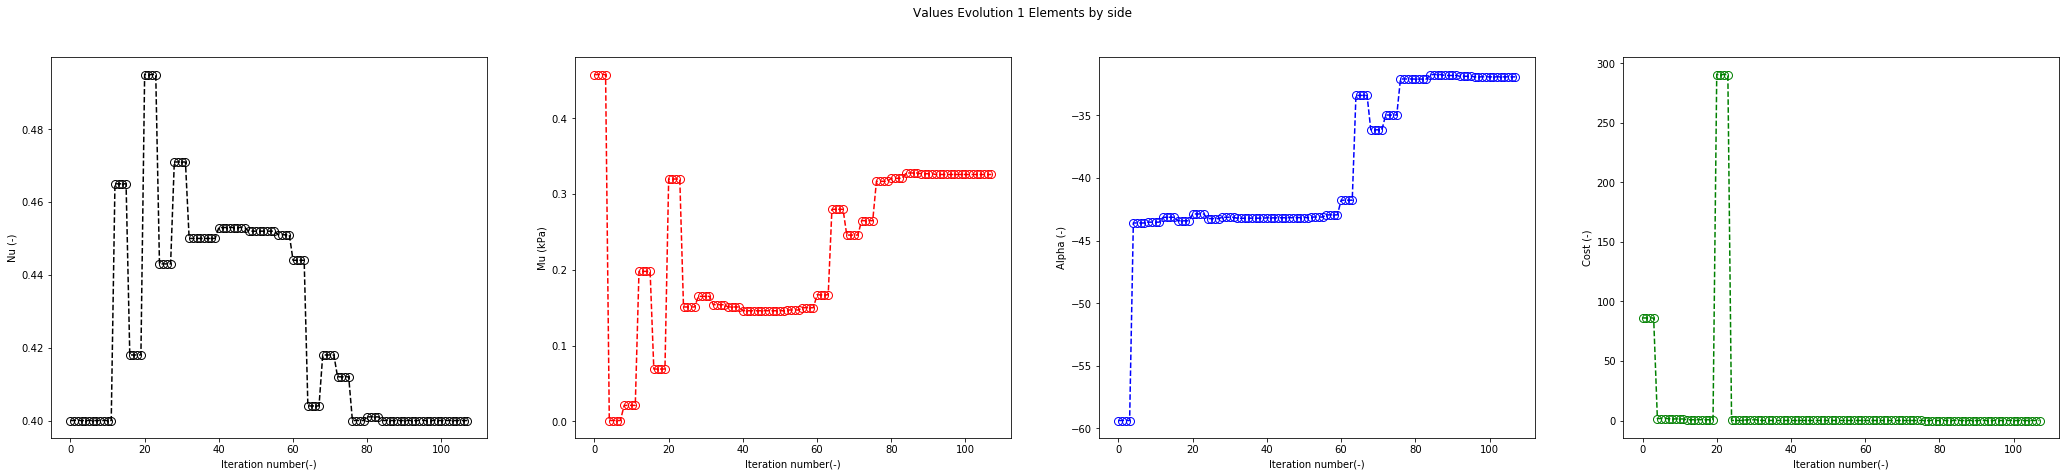

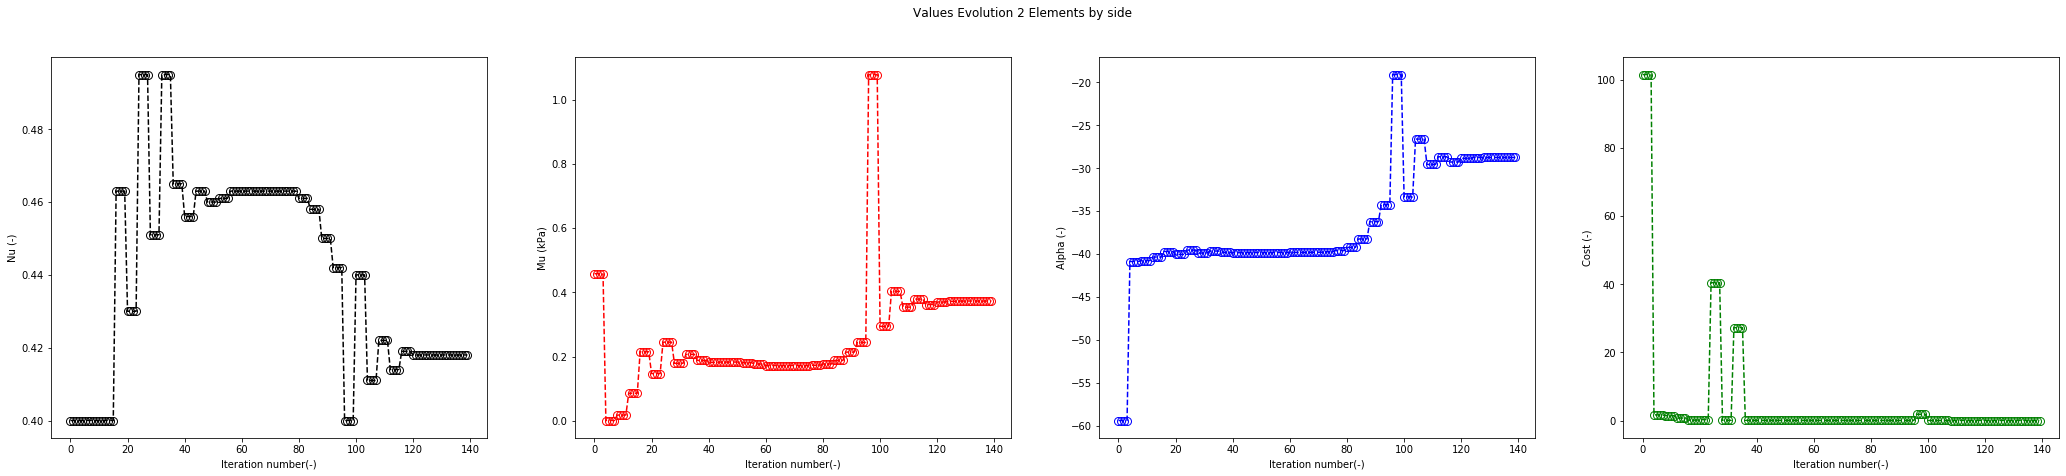

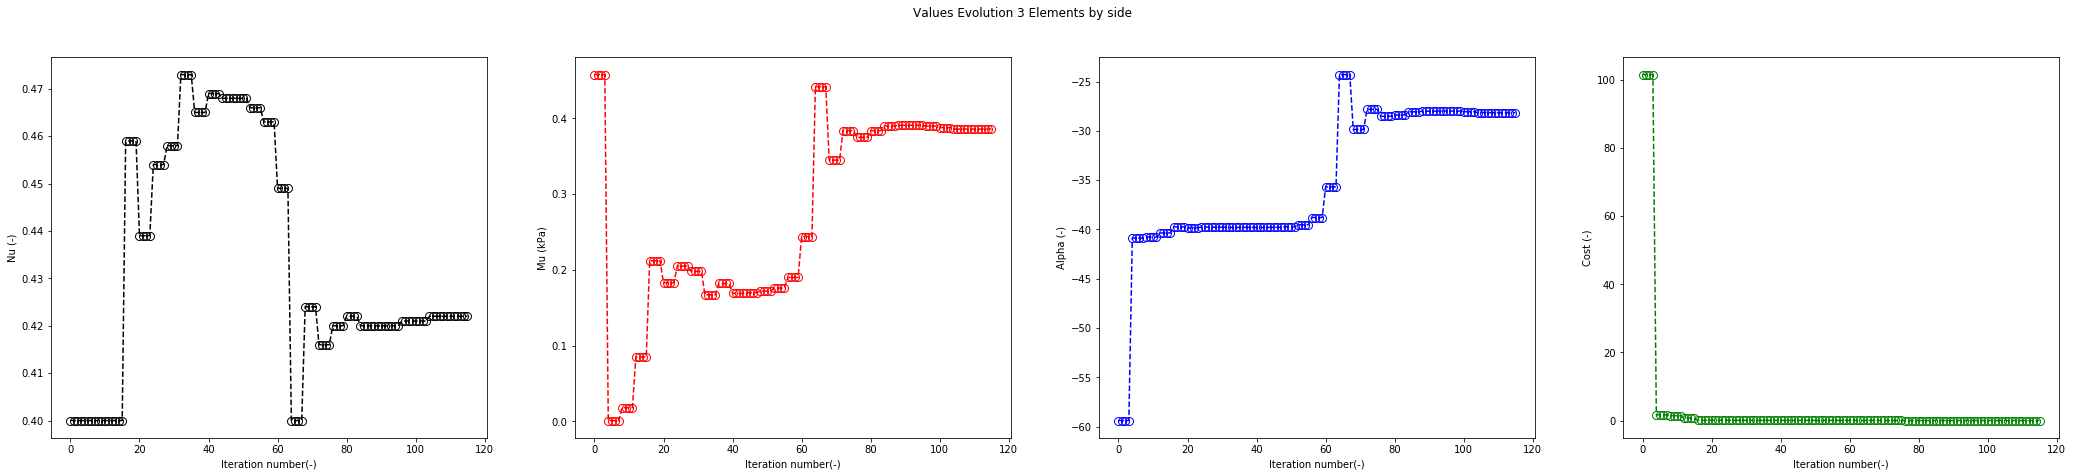

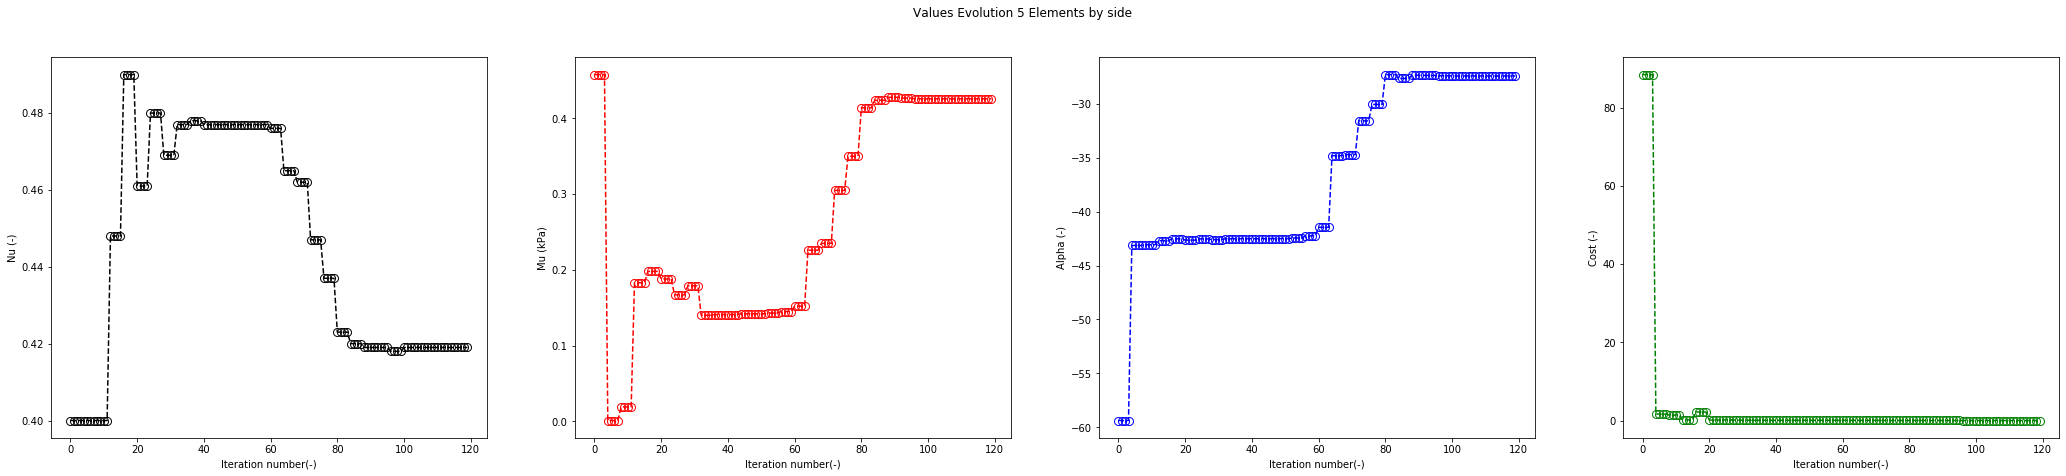

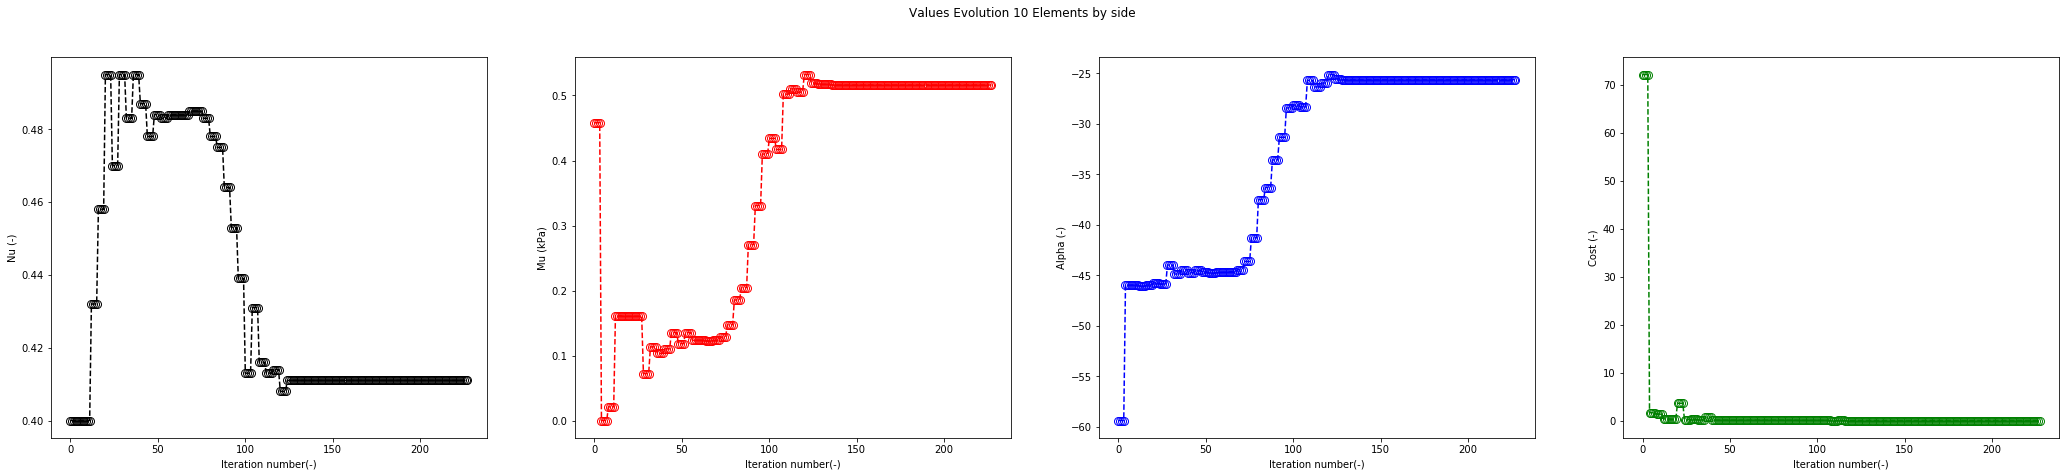

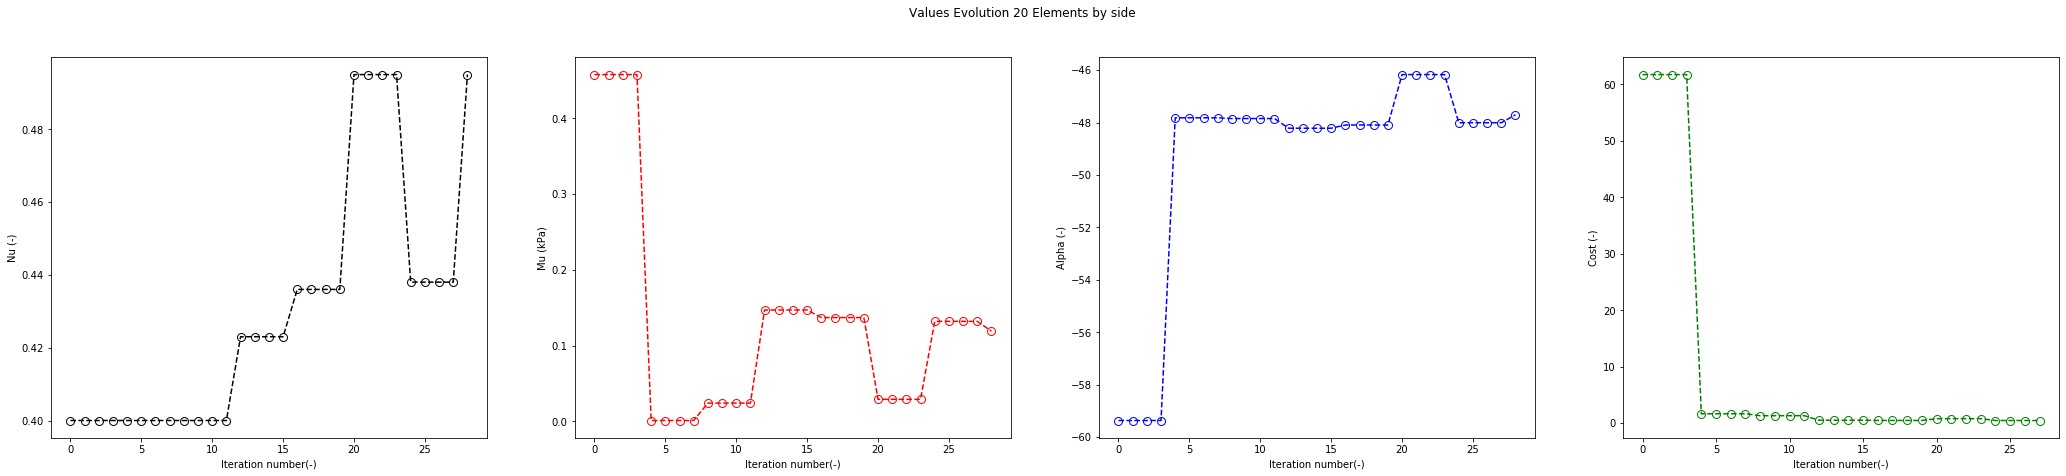

In [1]:
import pandas as pd                       # Allows to use data in tables
import matplotlib.pyplot as plt           # Allows to do plots


NumberElementsTested = [1,2,3,5,10,20]

for NumberElements in NumberElementsTested:

    df = pd.read_csv(str(NumberElements) + 'ElementsOptimizationResults.txt', sep=' ', decimal='.')

    plt.rc('figure', figsize=[36,7])
    fig = plt.figure()
    fig.suptitle('Values Evolution %i Elements by side'%(NumberElements))
    ax = fig.add_subplot(1, 4, 1)
    ax.cla()
    ax.plot(df.Nu,  color = 'k', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none')
    ax.set_xlabel('Iteration number(-)')
    ax.set_ylabel('Nu (-)')

    ax = fig.add_subplot(1, 4, 2)
    ax.cla()
    ax.plot(df.Mu,  color = 'r', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none')
    ax.set_xlabel('Iteration number(-)')
    ax.set_ylabel('Mu (kPa)')

    ax = fig.add_subplot(1, 4, 3)
    ax.cla()
    ax.plot(df.Alpha,  color = 'b', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none')
    ax.set_xlabel('Iteration number(-)')
    ax.set_ylabel('Alpha (-)')

    ax = fig.add_subplot(1, 4, 4)
    ax.cla()
    ax.plot(df.TotalCost,  color = 'g', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none')
    ax.set_xlabel('Iteration number(-)')
    ax.set_ylabel('Cost (-)')

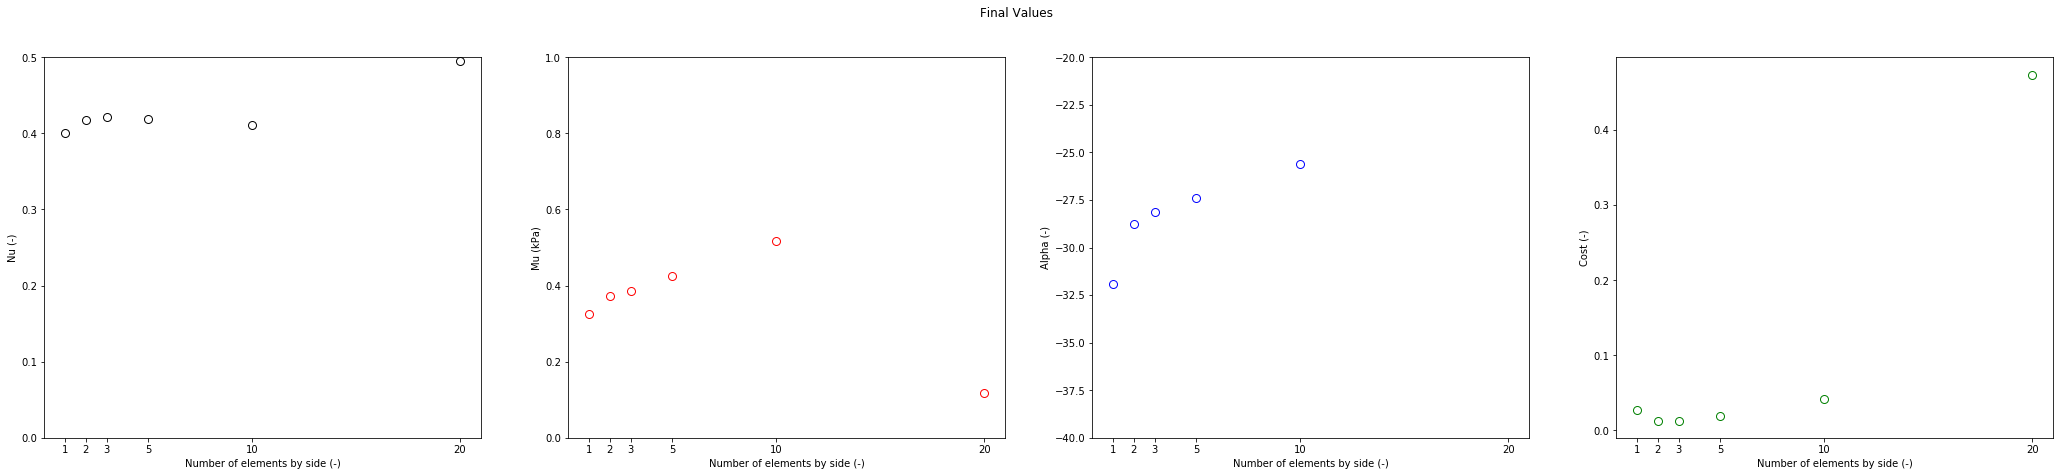

In [4]:
import pandas as pd                       # Allows to use data in tables
import matplotlib.pyplot as plt           # Allows to do plots


NumberElementsTested = [1,2,3,5,10,20]

Nus    = []
Mus    = []
Alphas = []
Costs  = []

for NumberElements in NumberElementsTested:

    df = pd.read_csv(str(NumberElements) + 'ElementsOptimizationResults.txt', sep=' ', decimal='.')
    
    FinalValues = df.iloc[-1]
    FinalCost   = df.iloc[-2]
    
    Nus.append(FinalValues.Nu)
    Mus.append(FinalValues.Mu)
    Alphas.append(FinalValues.Alpha)
    Costs.append(FinalCost.TotalCost)
    
plt.rc('figure', figsize=[36,7])
fig = plt.figure('Final Values')
fig.suptitle('Final Values')
ax = fig.add_subplot(1, 4, 1)
ax.cla()
ax.plot(NumberElementsTested, Nus,  color = 'k', linestyle = 'none', marker = 'o', markersize = 8, fillstyle='none')
ax.set_xlabel('Number of elements by side (-)')
ax.set_ylabel('Nu (-)')
ax.set_xlim(0,21)
ax.set_ylim(0,0.5)
plt.xticks(NumberElementsTested)

ax = fig.add_subplot(1, 4, 2)
ax.cla()
ax.plot(NumberElementsTested, Mus,  color = 'r', linestyle = 'none', marker = 'o', markersize = 8, fillstyle='none')
ax.set_xlabel('Number of elements by side (-)')
ax.set_ylabel('Mu (kPa)')
ax.set_xlim(0,21)
ax.set_ylim(0,1)
plt.xticks(NumberElementsTested)

ax = fig.add_subplot(1, 4, 3)
ax.cla()
ax.plot(NumberElementsTested, Alphas,  color = 'b', linestyle = 'none', marker = 'o', markersize = 8, fillstyle='none')
ax.set_xlabel('Number of elements by side (-)')
ax.set_ylabel('Alpha (-)')
ax.set_xlim(0,21)
ax.set_ylim(-40,-20)
plt.xticks(NumberElementsTested)

ax = fig.add_subplot(1, 4, 4)
ax.cla()
ax.plot(NumberElementsTested, Costs,  color = 'g', linestyle = 'none', marker = 'o', markersize = 8, fillstyle='none')
ax.set_xlabel('Number of elements by side (-)')
ax.set_ylabel('Cost (-)')
ax.set_xlim(0,21)
#ax.set_ylim(0,0.05)
plt.xticks(NumberElementsTested)

plt.show()

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


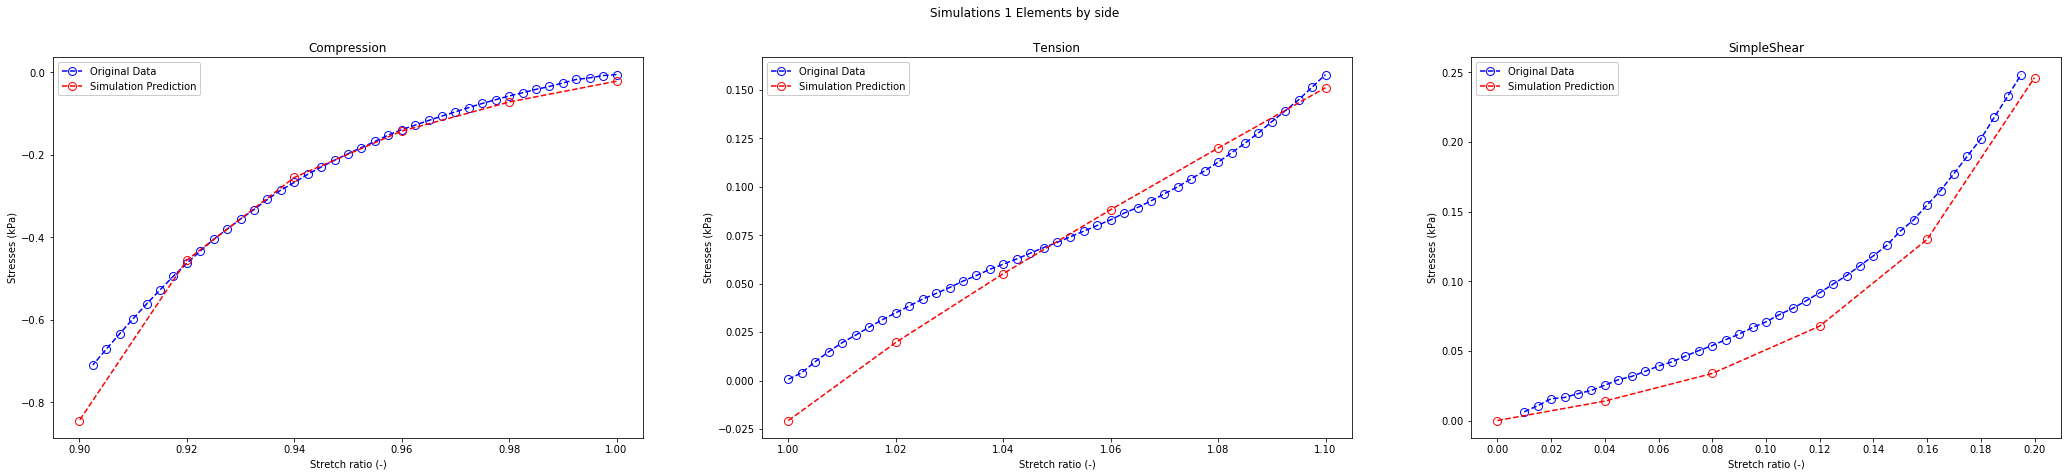

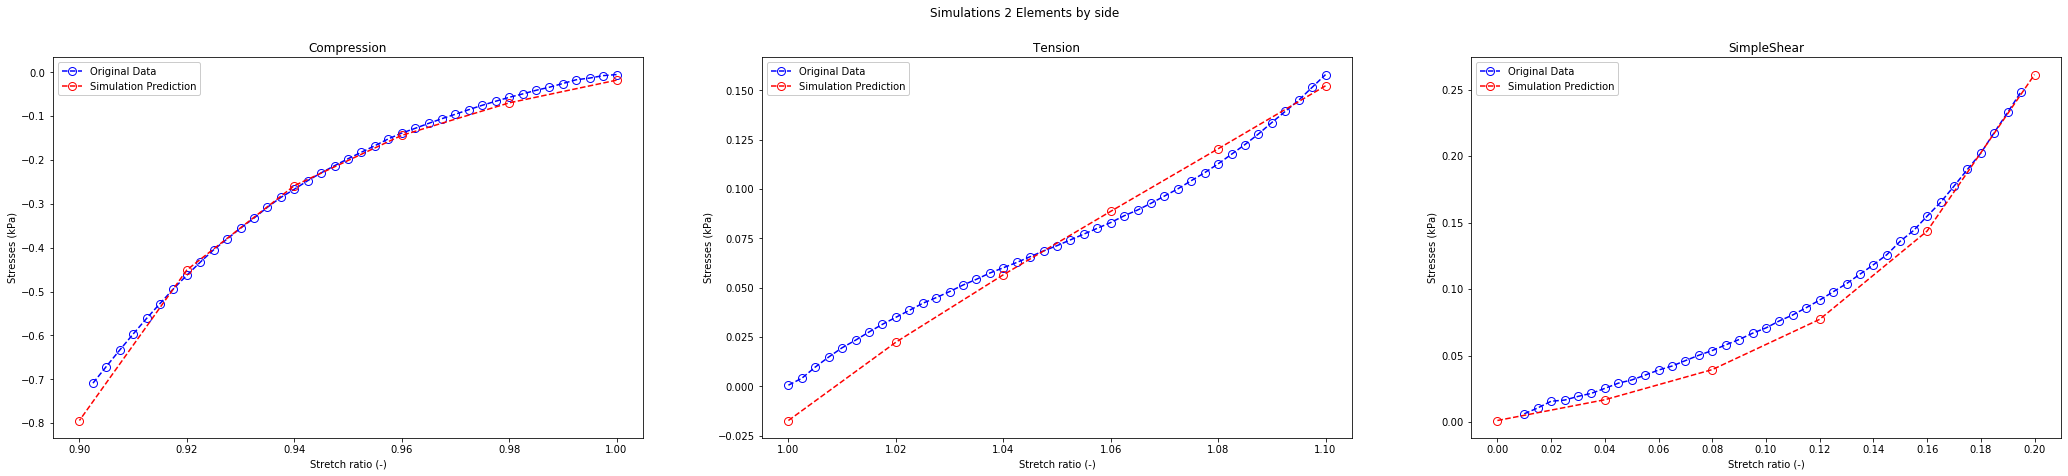

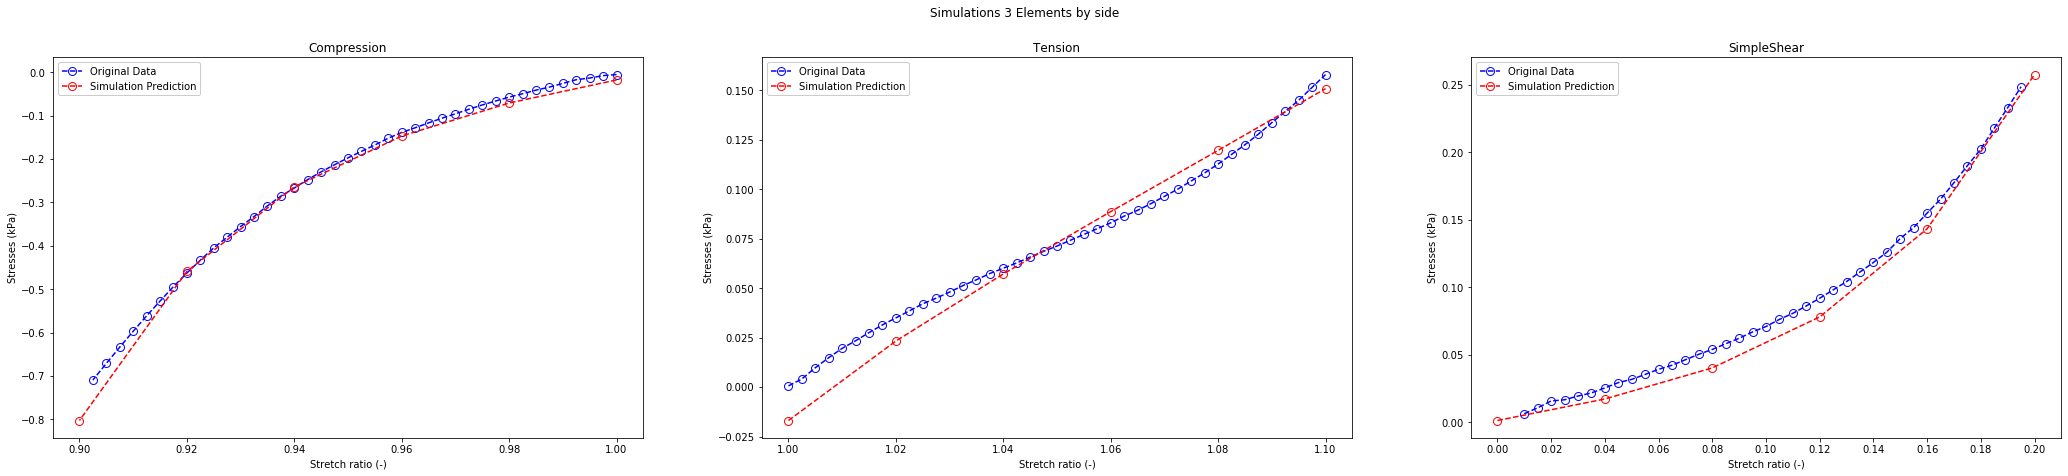

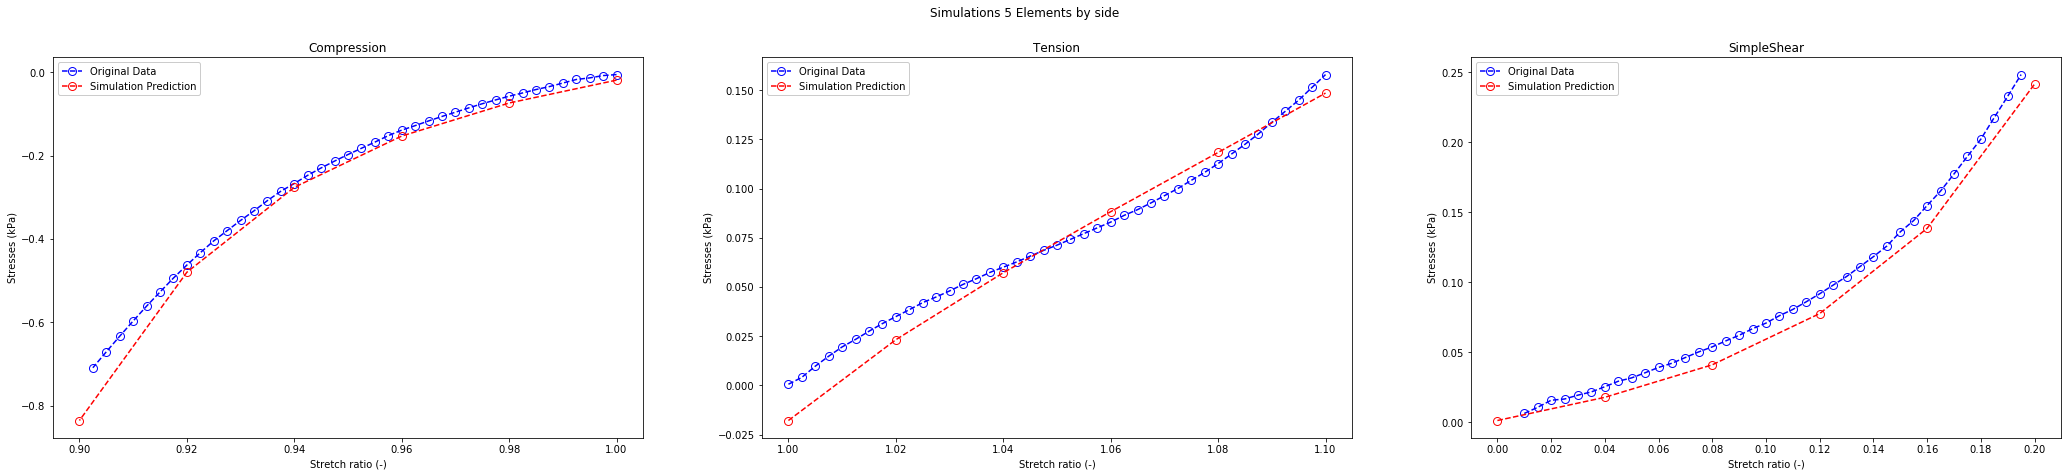

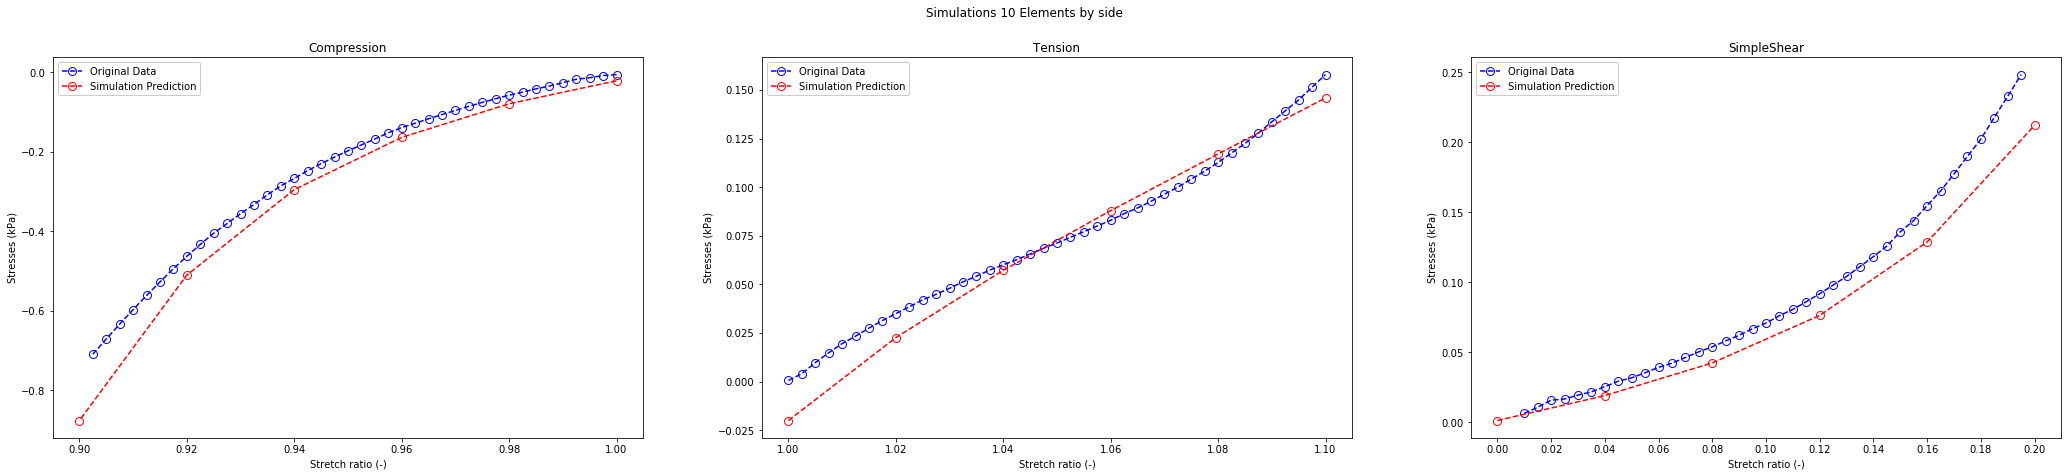

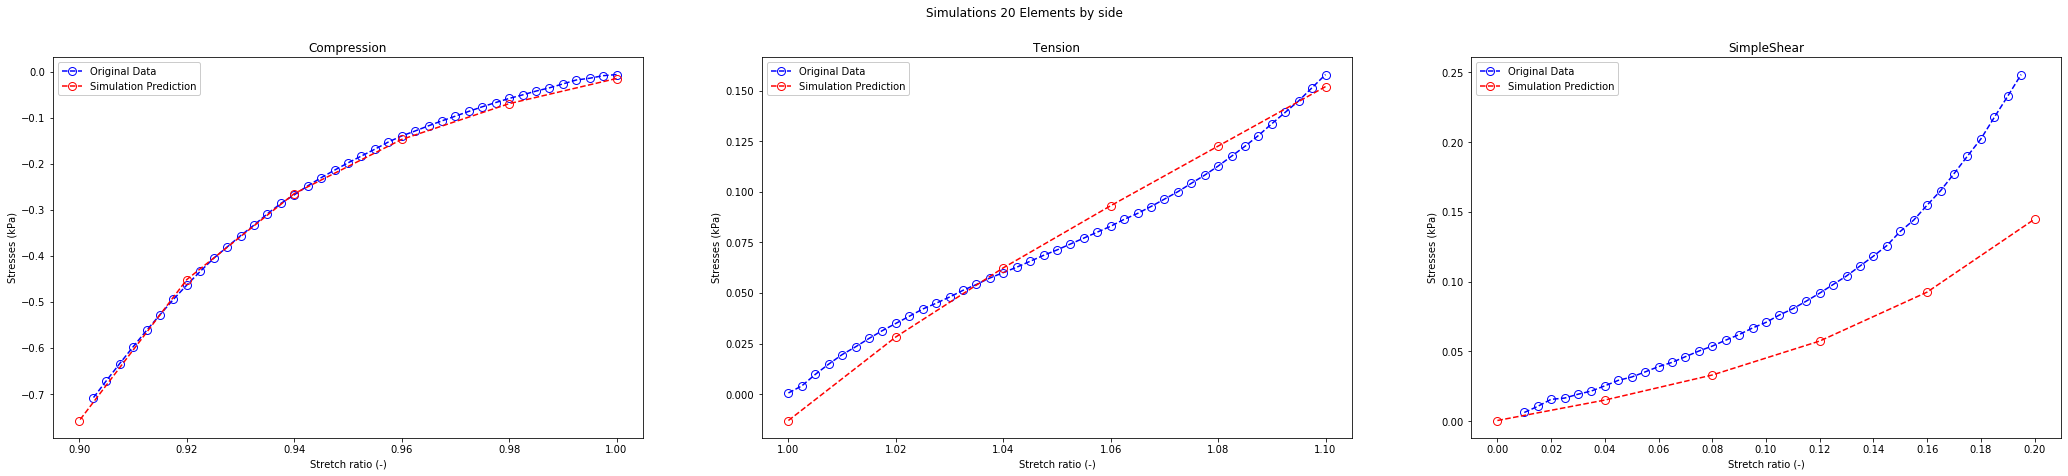

In [72]:
import pandas as pd                       # Allows to use data in tables
import matplotlib.pyplot as plt           # Allows to do plots
import os                                 # Allows to use path
import SimpleFunctions as SF

NumberElementsTested = [1,2,3,5,10,20]
NumberElements = NumberElementsTested[0]

LoadCases = ['Compression', 'Tension', 'SimpleShear']
LoadCase = LoadCases[0]

Nus    = []
Mus    = []
Alphas = []
Costs  = []

for NumberElements in NumberElementsTested:
    
    df = pd.read_csv(str(NumberElements) + 'ElementsOptimizationResults.txt', sep=' ', decimal='.')
    
    FinalValues = df.iloc[-1]
    
    Nus.append(FinalValues.Nu)
    Mus.append(FinalValues.Mu)
    Alphas.append(FinalValues.Alpha)
    Costs.append(FinalValues.TotalCost)
    
    plt.rc('figure', figsize=[36,7])
    fig = plt.figure()
    fig.suptitle('Simulations %i Elements by side'%(NumberElements))

    for LoadCase in LoadCases:

        # Simulation parameters
        FinalRelativeStretch = 0.1
        RelativeStepSize     = 0.02

        # optimized values
        Nu = Nus[NumberElementsTested.index(NumberElements)]
        Mu = Mus[NumberElementsTested.index(NumberElements)]
        Alpha = Alphas[NumberElementsTested.index(NumberElements)]

        D = 3*(1-2*Nu)/(Mu*(1+Nu))

        # Mesh
        Dimensions = [5,5,5]
        [Mesh, V, u, du, v] = SF.MeshDefinition(Dimensions, NumberElements)
        [F, J, C, Ic] = SF.Kinematics(u)

        # Strain energy density function (Ogden)
        Psi = SF.CompressibleOgden(Mu, Alpha, D, C, Ic, J)

        # Simulate the solution
        DataFrame = SF.SolveProblem(LoadCase, FinalRelativeStretch, RelativeStepSize, Dimensions, NumberElements, Mesh, V, u, du, v, Ic, J, F, Psi)

        # Experimental data
        FolderPath = os.path.join('/home/msimon/Desktop/SHARED/ScriptsAndData/ExperimentalData/')
        FilePath = os.path.join(FolderPath, 'CR_' + LoadCase + '_ExpDat.csv')
        ExpData = pd.read_csv(FilePath, sep=';', header=None, decimal=',')

        # Plot       
        ax = fig.add_subplot(1, 3, LoadCases.index(LoadCase)+1)
        ax.cla()
        ax.plot(ExpData[0], ExpData[1],  color = 'b', linestyle = '--', label = 'Original Data', marker = 'o', markersize = 8, fillstyle='none')
        ax.plot(DataFrame.Stretches, DataFrame.P,  color = 'r', linestyle = '--', label = 'Simulation Prediction', marker = 'o', markersize = 8, fillstyle='none')
        ax.set_xlabel('Stretch ratio (-)')
        ax.set_ylabel('Stresses (kPa)')
        ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
        ax.legend(loc='upper left', frameon=True, framealpha=1)
        plt.title(LoadCase)

plt.show()

In [6]:
import pandas as pd                       # Allows to use data in tables
import matplotlib.pyplot as plt           # Allows to do plots
import os

LoadCases = ['Compression', 'Tension', 'SimpleShear']
#LoadCase = LoadCases[0]

NumberElementsTested = [1,2,3,5,10,20]

plt.rc('figure', figsize=[34,7])
fig = plt.figure()
fig.suptitle('Simulation Results Comparison')

for LoadCase in LoadCases:
    
    df   = pd.read_csv('ExperimentalData/CR_' + LoadCase + '_ExpDat.csv', sep=';', decimal=',', header=None)
    df1  = pd.read_csv('ResultsOgden/' + str(NumberElementsTested[0]) + 'Elements_' + LoadCase, sep=',', decimal='.', usecols=[1,2])
    df2  = pd.read_csv('ResultsOgden/' + str(NumberElementsTested[1]) + 'Elements_' + LoadCase, sep=',', decimal='.', usecols=[1,2])
    df3  = pd.read_csv('ResultsOgden/' + str(NumberElementsTested[2]) + 'Elements_' + LoadCase, sep=',', decimal='.', usecols=[1,2])
    df5  = pd.read_csv('ResultsOgden/' + str(NumberElementsTested[3]) + 'Elements_' + LoadCase, sep=',', decimal='.', usecols=[1,2])
    df10 = pd.read_csv('ResultsOgden/' + str(NumberElementsTested[4]) + 'Elements_' + LoadCase, sep=',', decimal='.', usecols=[1,2])
    df20 = pd.read_csv('ResultsOgden/' + str(NumberElementsTested[5]) + 'Elements_' + LoadCase, sep=',', decimal='.', usecols=[1,2])

    ax = fig.add_subplot(1, 3, LoadCases.index(LoadCase)+1)
    ax.cla()
    ax.plot(df[0], df[1],  color = 'k', linestyle = '-')
    ax.plot(df1.Stretches, df1.P,  color = 'r', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none', label=' 1 Element')
    ax.plot(df2.Stretches, df2.P,  color = 'g', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none', label=' 2 Elements')
    ax.plot(df3.Stretches, df3.P,  color = 'b', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none', label=' 3 Elements')
    ax.plot(df5.Stretches, df5.P,  color = 'y', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none', label=' 5 Elements')
    ax.plot(df10.Stretches, df10.P,  color = 'c', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none', label='10 Elements')
    ax.plot(df10.Stretches, df20.P,  color = 'm', linestyle = '--', marker = 'o', markersize = 8, fillstyle='none', label='20 Elements')

    ax.set_xlabel('Stretch ratio (-)')
    ax.set_ylabel('Stress (kPa)')
    ax.legend(loc='upper left', frameon=True, framealpha=1)
    plt.title(LoadCase)

plt.savefig(os.path.join('Comparison' + '.pdf'))

plt.show()

FileNotFoundError: [Errno 2] File ResultsOgden/1Elements_Compression does not exist: 'ResultsOgden/1Elements_Compression'

<Figure size 2448x504 with 0 Axes>